In [67]:
# import all the neccesary packages and the MNIST image package 
from fastai.vision.all import *
path = untar_data(URLs.MNIST_SAMPLE)

# Some things about tensors and images in computers

 we can open images in python with the PIL library and the method `Image.Open()`, for example, for showing the second image in the 3's path: 

In [68]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

Image.open(threes[1])

Also we can see the pixel composition of these using pytorch tensors in the following manner, note that each pixel is represented by a number between 0 and 255 (following the RGB standar) where 0 represents a white pixel while 255 represents a black pixel, and the numbers between those two represensts a gray scale  

In [69]:
im3 = Image.open(threes[1])                                                                         # open the image 
tensor(im3)[1:10,1:10]                                                                              # showing only a small portion of the image using o tensor 

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  29],
        [  0,   0,   0,   0,   0,   0,  48, 166, 224],
        [  0,   0,   0,   0,  93, 244, 249, 253, 187],
        [  0,   0,   0,   0, 107, 253, 253, 230,  48],
        [  0,   0,   0,   0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

For computational purposes we can stack all the images on the folders into a single 3-dimensional tensor (rank 3 tensor) with the `torch.stack` method, after this we can calcualate the mean of each pixel in all the images in order to obtain a mean 3 and a mean 7 

In [70]:
seven_tensor = [tensor(Image.open(o)) for o in sevens]                                              # using list comprehensions for collecting all the images in the folder 
three_tensor = [tensor(Image.open(o)) for o in threes]

len(three_tensor), len(seven_tensor)                                                                # lengths of the tensors
stacked_sevens = torch.stack(seven_tensor).float()/255                                              # stacking all the images into a single tensor 
stacked_threes = torch.stack(three_tensor).float()/255

In [28]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

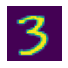

In [29]:
a_3 = stacked_threes[1]
show_image(a_3)

Finally we can calculate the metrics for the errors on each image by comparing these with the previously calculated mean, for this purpose we use the `torch.nn.functional` from pytorch

In [33]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

extracting the images from the validation set, and using the mse to calculate the distance to the mean images 

In [71]:
# create the tensors with the vallidation set images 
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])             
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [72]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))                                           # function for calculating the mse error

mnist_distance(a_3, mean3)                                                                         

valid_3_dist = mnist_distance(valid_3_tens, mean3)                                                  # distance between the validation images and the mean image 
valid_3_dist,valid_3_dist.shape


(tensor([0.1296, 0.1187, 0.1424,  ..., 0.1211, 0.1469, 0.1260]),
 torch.Size([1010]))

With this we can define if an image is a three or a seven by using the distance to the mean image of each of these with a selected image `x`

In [73]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

And finally calculate the accuracy with respect to the predictions (we are using a function to calculate if the image is a 3, therefore the accuracy for the seven is the inverse of this)

In [74]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s, accuracy_7s

(tensor(0.9168), tensor(0.9854))

# Stochastic gradient descent 